## Let's import necessary libraries

In [4]:
import pandas as pd
import os 

## let's merge 12 months of sales data into a single file

In [5]:
df= pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files :
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
# Remove the first six columns
all_months_data = all_months_data.iloc[:, 6:]
    
all_months_data.to_csv("all_data.csv", index=False)

In [6]:
all_data =pd.read_csv("./all_data.csv")
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN
2,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## drop rows of NAN

In [7]:
all_data =pd.read_csv("./all_data.csv")
all_data.dropna(how='all', inplace=True)
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
all_data = pd.read_csv("./all_data.csv")

# Get the number of rows before dropping
num_rows_before = all_data.shape[0]

# Drop rows with all NaN values
all_data.dropna(how='all', inplace=True)

# Get the number of rows after dropping
num_rows_after = all_data.shape[0]

# Calculate the number of rows that were deleted
num_rows_deleted = num_rows_before - num_rows_after

# Print the number of rows after dropping
print("Number of rows after dropping rows with all NaN values:", num_rows_after)

# Print the number of rows before dropping
print("Number of rows before dropping:", num_rows_before)

# Print the number of rows that were deleted
print("Number of rows deleted:", num_rows_deleted)


Number of rows after dropping rows with all NaN values: 186305
Number of rows before dropping: 186850
Number of rows deleted: 545


## Question 1 : What was the best month for sales ? How much was earned that month?

### Let's add a month column

In [9]:
# Load the DataFrame from the CSV file
all_data = pd.read_csv("./all_data.csv")

# Filter out rows where 'Order Date' does not contain 'Order Date'
all_data = all_data.dropna(subset=['Order Date'])
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

# Extract month from 'Order Date' and create a new column 'Month'
all_data['Month'] = all_data['Order Date'].str[0:2].fillna('00').astype('int32')

# Convert columns to appropriate data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### let's add a sales column

In [10]:
# Convert columns to numeric data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Calculate total sale amount for each order and create a new column 'Sale'
all_data['Sale'] = all_data['Quantity Ordered'] * all_data['Price Each']


display(all_data.head())

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### let's groupe the data by month

In [11]:
all_data.groupby('Month').sum()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale
Month,,,,,,
1,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73
2,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42
3,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
4,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24
5,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75
6,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26
7,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76
8,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88
9,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13


In [12]:
results = all_data.groupby('Month').sum()
monthly_sales = all_data.groupby('Month')['Sale'].sum()

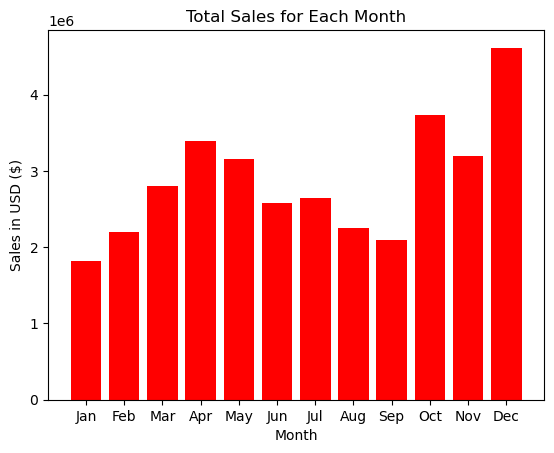

In [115]:
import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, monthly_sales, color='red')
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.title('Total Sales for Each Month')
plt.show()

In [13]:
# Load the DataFrame from the CSV file
all_data = pd.read_csv("./all_data.csv")

# Filter out rows where 'Order Date' does not contain 'Order Date'
all_data = all_data.dropna(subset=['Order Date'])
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

# Extract month from 'Order Date' and create a new column 'Month'
all_data['Month'] = all_data['Order Date'].str[0:2].fillna('00').astype('int32')

# Convert columns to appropriate data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Calculate the total sales for each order
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# Calculate the total sales for each month
monthly_sales = all_data.groupby('Month')['Total Sales'].sum()

# Find the month with the highest total sales
best_month = monthly_sales.idxmax()

# Get the amount earned in the best month
amount_earned = monthly_sales.max()

# Print the results
print("The best month for sales was:", best_month)
print("The amount earned that month was:", amount_earned)


The best month for sales was: 12
The amount earned that month was: 4613443.34


In [14]:
import seaborn as sns

In [23]:
# Ensure that 'Month' column is correctly extracted from 'Order Date' column before performing groupby operation
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month

# Group by both 'Month' and 'Product' columns and sum the sales
product_sales = all_data.groupby(['Month', 'Product'])['Sale'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(product_sales, cmap="YlGnBu")
plt.title('Product Sales Across Months')
plt.xlabel('Product')
plt.ylabel('Month')
plt.show()

C:\Users\koulo\AppData\Local\Temp\ipykernel_40620\307340627.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month


DateParseError: Unknown datetime string format, unable to parse: Order Date, at position 519

In [21]:
# Load the data
all_data = pd.read_csv("all_data.csv")

# Display the first few rows of the DataFrame
display(all_data.head())


,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN
2,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [19]:
# Load the data, skipping the first row
all_data = pd.read_csv("all_data.csv")

# Ensure that 'Month' column is correctly extracted from 'Order Date' column before performing groupby operation
all_data['Month'] = pd.to_datetime(all_data['Order Date'], errors='coerce', format='%m/%d/%y %H:%M').dt.month

# Remove rows with NaN in 'Month' column
all_data = all_data.dropna(subset=['Month'])

# Convert 'Month' column to integer type
all_data['Month'] = all_data['Month'].astype(int)

# Group by both 'Month' and 'Product' columns and sum the sales
product_sales = all_data.groupby(['Month', 'Product'])['Sale'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(product_sales, cmap="YlGnBu")
plt.title('Product Sales Across Months')
plt.xlabel('Product')
plt.ylabel('Month')
plt.show()


KeyError: 'Column not found: Sale'

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data, skipping the first row
all_data = pd.read_csv("all_data.csv")

# Convert columns to numeric data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Calculate total sale amount for each order and create a new column 'Sale'
all_data['Sale'] = all_data['Quantity Ordered'] * all_data['Price Each']

# Ensure that 'Month' column is correctly extracted from 'Order Date' column before performing groupby operation
all_data['Month'] = pd.to_datetime(all_data['Order Date'], errors='coerce', format='%m/%d/%y %H:%M').dt.month

# Remove rows with NaN in 'Month' column
all_data = all_data.dropna(subset=['Month'])

# Convert 'Month' column to integer type
all_data['Month'] = all_data['Month'].astype(int)

# Group by both 'Month' and 'Product' columns and sum the sales
product_sales = all_data.groupby(['Month', 'Product'])['Sale'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(product_sales, cmap="YlGnBu")
plt.title('Product Sales Across Months')
plt.xlabel('Product')
plt.ylabel('Month')
plt.show()


ValueError: Unable to parse string "Quantity Ordered" at position 519

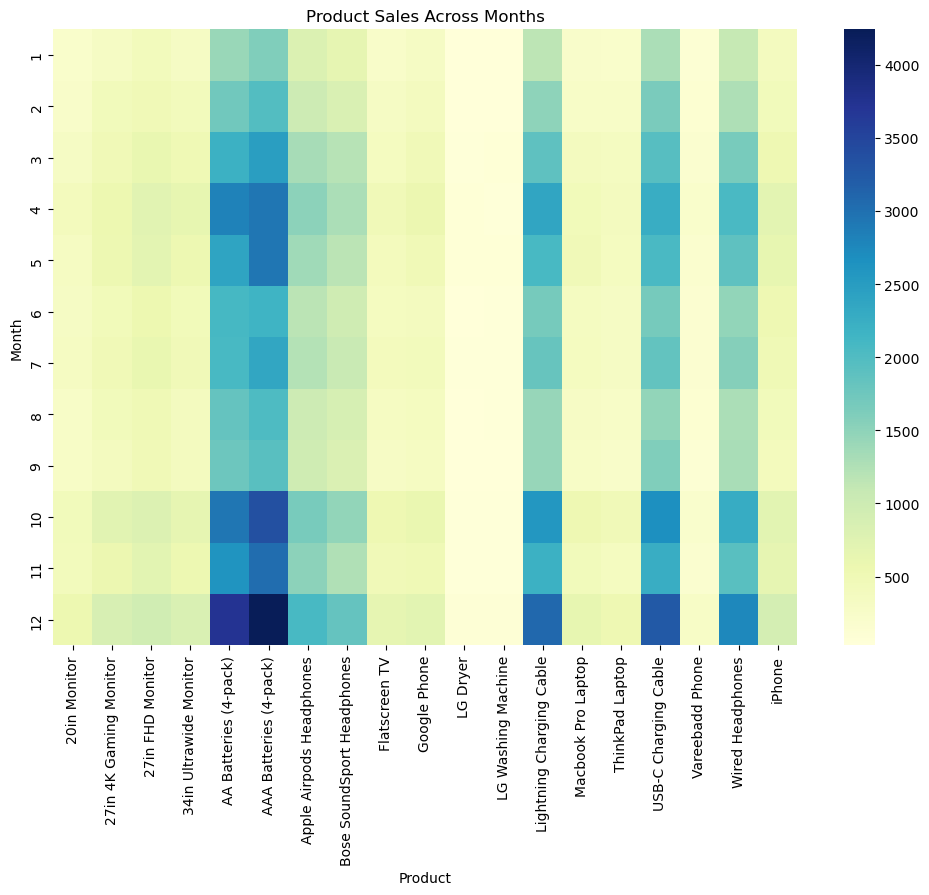

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data, skipping the empty row at index 1
all_data = pd.read_csv("all_data.csv", skiprows=[1])

# Drop rows with missing values
all_data = all_data.dropna()

# Convert columns to numeric data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Ensure that 'Month' column is correctly extracted from 'Order Date' column before performing groupby operation
all_data['Month'] = pd.to_datetime(all_data['Order Date'], errors='coerce', format='%m/%d/%y %H:%M').dt.month

# Remove rows with NaN in 'Month' column
all_data = all_data.dropna(subset=['Month'])

# Convert 'Month' column to integer type
all_data['Month'] = all_data['Month'].astype(int)

# Group by both 'Month' and 'Product' columns and sum the sales
product_sales = all_data.groupby(['Month', 'Product'])['Quantity Ordered'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(product_sales, cmap="YlGnBu")
plt.title('Product Sales Across Months')
plt.xlabel('Product')
plt.ylabel('Month')
plt.show()
